##Importing Libs and DS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
logistic = np.genfromtxt("logistic_regression_data.csv", delimiter = ',')

## Funcs

In [ ]:
def sigmoid(v):
    return (1 / (1 + np.exp(-v)))

In [ ]:
def NormalizeZScore(dataset: np.ndarray, ones: bool = True):
    dataX = dataset[:, :-1]
    Xmean = np.mean(dataX, axis = 0)
    Xstd = np.std(dataX, axis = 0)
    dataX = (dataX - Xmean)/Xstd
    if ones:
        dataX = np.c_[np.ones((dataX.shape[0])), dataX]
    dataY = dataset[:, -1]
    return dataX, Xmean, Xstd, dataY

In [ ]:
def NormalizePoint(p, mean, std):
    return (p-mean)/std
def DenormalizePoint(p, mean, std):
    return (p*std) + mean

In [ ]:
def IRLS_MAP(Xn: np.ndarray, Y: np.ndarray):
    m0 = np.zeros(Xn.shape[1])
    S0 = np.eye(Xn.shape[1])
    w = np.zeros(Xn.shape[1])
    for i in range(20):
        p = Xn @ w
        R = sigmoid(p) * (1 - sigmoid(p))
        R = R * np.eye(R.shape[0])
        A = (Xn.T @ R @ Xn) + np.linalg.inv(S0)
        w = w + np.linalg.inv(A)@(Xn.T@(Y - sigmoid(Xn @ w)) - (np.linalg.inv(S0)@(w - m0)))
    return w, R

In [ ]:
def BLogR(Xn: np.ndarray, Y: np.ndarray):
    w, R = IRLS_MAP(Xn, Y)
    H = Xn.T @ R @ Xn + np.linalg.inv(np.eye(Xn.shape[1]))
    return w, np.linalg.inv(H)

## Questão 1

In [ ]:
dataset_X, x_mean, x_std, dataset_Y = NormalizeZScore(logistic)

In [ ]:
logu, logstd = BLogR(dataset_X, dataset_Y)

In [ ]:
x1, x2 = np.mgrid[slice(np.min(logistic[:,0]) - 0.5, np.max(logistic[:, 0]) + 0.5, 0.01),
                  slice(np.min(logistic[:,1]) - 0.5, np.max(logistic[:, 1]) + 0.5, 0.01)]
x_plot = np.dstack((x1, x2))
x_plot_n = np.apply_along_axis(func1d = NormalizePoint, arr = x_plot, axis = 2, mean = x_mean, std = x_std)
x_plot_n = np.dstack((np.ones(x1.shape), x_plot_n))
values = np.apply_along_axis(func1d = (lambda x: (np.sqrt(1 + (np.pi*((x.T@logstd@x)**2)/8))*(logu.T@x))), arr = x_plot_n, axis = 2)

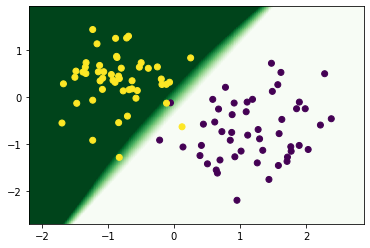

In [ ]:
x, y = logistic[:, [0,1]], logistic[:, -1]
back = plt.pcolormesh(x1, x2, values, cmap = 'Greens', vmin = 0, vmax = 1)
scatter = plt.scatter(x = x[:, 0], y = x[:, 1], c = y)
plt.show()

##Questão 2

In [ ]:
votes = np.genfromtxt('votesDataset.csv', dtype = str, delimiter = ',', skip_header = 1)

In [ ]:
target = votes[:, 0]
features = votes[:, 1:]
target = target == 'democrat'
target = target.astype('int')
features = features.astype('int')

In [ ]:
dir = np.ones(2)
betas = np.ones((2, features.shape[1], 2))

In [ ]:
pi_ = np.zeros(2)
pi_[0] = (dir[0] + np.sum(target == 0))/(target.shape[0] + np.sum(dir))
pi_[1] = (dir[1] + np.sum(target == 1))/(target.shape[0] + np.sum(dir))

In [ ]:
theta_ = np.zeros((2, features.shape[1]))
c0 = features[target == 0]
c1 = features[target == 1]
for i in range(features.shape[1]):
  theta_[0, i] = (np.sum(c0[:, i] == 1) + betas[0, i, 1])/(c0.shape[0] + np.sum(betas[0, i]))
  theta_[1, i] = (np.sum(c1[:, i] == 1) + betas[1, i, 1])/(c1.shape[0] + np.sum(betas[1, i]))

In [ ]:
p1 = np.apply_along_axis(func1d = lambda x: pi_[1] * np.prod(((theta_[1])**((x==1).astype('int')))*((1 - theta_[1])**((x==0).astype('int')))), arr = features, axis = 1)
p0 = np.apply_along_axis(func1d = lambda x: pi_[0] * np.prod(((theta_[0])**((x==1).astype('int')))*((1 - theta_[0])**((x==0).astype('int')))), arr = features, axis = 1)
prediction = (p1 > p0).astype('int')

In [ ]:
p_t = np.c_[prediction, target]

In [ ]:
tp = np.sum(p_t[p_t[:, 1] == 1, 0] == 1)
tn = np.sum(p_t[p_t[:, 1] == 0, 0] == 0)
fp = np.sum(p_t[p_t[:, 1] == 0, 0] == 1)
fn = np.sum(p_t[p_t[:, 1] == 1, 0] == 0)

In [ ]:
print("Usando democrata como valor 1 - positivo e republicano como 0 - negativo:")
print(f"True Positive: {tp}")
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")

Usando democrata como valor 1 - positivo e republicano como 0 - negativo:
True Positive: 239
True Negative: 148
False Positive: 20
False Negative: 28


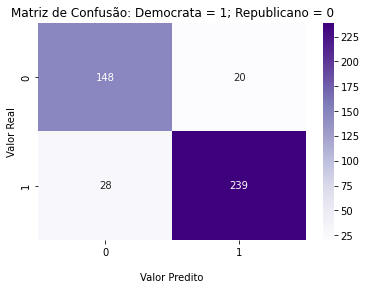

In [ ]:
cf = np.array([[tn, fp], [fn, tp]])
plot = sns.heatmap(cf, annot = True, cmap = 'Purples', fmt = 'g')
plot.set_xlabel("\nValor Predito")
plot.set_ylabel("Valor Real")
plot.set_title("Matriz de Confusão: Democrata = 1; Republicano = 0")
plt.show()